In [ ]:
# This script calculates the sharpness of oscillations

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import pac
import shap_L as til
from scipy.signal import firwin

**Load data**

In [3]:
lfp = til.loadPD()
Fs, t, S, Sdy, flo, fhi = til.loadmeta()
print(range(S))

range(0, 14)


In [4]:

t = np.arange(0, 30, 1 / Fs) 
print(lfp)
print(flo)

{'B': array([ array([ 0.0962085 , -0.00092055, -0.09882271, ...,  0.33850038,
        0.41848142,  0.49478286]),
       array([-0.45553796, -0.48377406, -0.49912103, ...,  0.16725145,
        0.05560312, -0.05971753]),
       array([-0.80660836, -0.74279407, -0.65267216, ..., -0.10653125,
        0.02247933,  0.15488279]),
       array([ 0.10585495,  0.07025531,  0.02610244, ..., -0.17868236,
       -0.2311736 , -0.27968951]),
       array([-0.87461408, -0.56813078, -0.22969443, ..., -0.73826158,
       -0.74500499, -0.73110964]),
       array([ 0.94207718,  0.86867584,  0.78317207, ..., -0.06643523,
       -0.04686427, -0.02054185]),
       array([ 0.41689735,  0.24339447,  0.0567377 , ...,  1.15848912,
        1.25575226,  1.30126842]),
       array([-0.04036331,  0.01057428,  0.05297657, ..., -0.91192926,
       -0.73863515, -0.54845282]),
       array([ 1.86788634,  1.87539289,  1.84705674, ..., -0.69796592,
       -0.81425378, -0.91384006]),
       array([ 0.11579519,  0.29677647,

 **Compute features of waveform shape**

In [5]:
import shape
pks, trs = shape.findpt(
            lfp['B'][4], (13,30), Fs=1000, boundary=100)
print(pks)

[  103   154   182   251   317   354   390   425   455   499   527   571
   613   651   716   751   776   826   906   938   987  1060  1094  1149
  1178  1253  1325  1378  1410  1449  1489  1525  1610  1650  1698  1755
  1797  1852  1899  1941  1995  2023  2055  2093  2126  2171  2206  2265
  2278  2335  2368  2422  2463  2514  2548  2595  2640  2673  2738  2768
  2834  2872  2901  2929  2985  3027  3056  3099  3156  3201  3240  3274
  3315  3344  3390  3456  3493  3548  3595  3632  3690  3732  3780  3846
  3876  3936  3970  4021  4055  4121  4202  4235  4299  4331  4384  4460
  4512  4558  4611  4664  4705  4766  4801  4862  4911  4939  4990  5067
  5135  5194  5246  5290  5326  5361  5442  5445  5513  5564  5597  5654
  5691  5732  5784  5833  5873  5913  5976  6009  6063  6128  6147  6201
  6236  6304  6366  6401  6474  6531  6592  6638  6686  6747  6791  6869
  6935  6964  7003  7040  7093  7148  7203  7249  7311  7350  7396  7448
  7505  7550  7612  7655  7716  7761  7796  7857  7

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


In [6]:


widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = til.measure_shape(lfp, widthS=widthS)

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


# A
### Locating oscillatory extrema

In [27]:
# Select one recording
group ='B'
subj=12
x = lfp[group][subj]

# Bandpass filter in be ta frequency range
w = 3
xbeta = til.firf(x, flo, Fs, w = w, rmvedge=False)

# Determine rising and falling zerocrossings.
pos = xbeta > 0
zerorises = (pos[:-1] & ~pos[1:]).nonzero()[0]
pos = xbeta < 0
zerofalls = (pos[:-1] & ~pos[1:]).nonzero()[0]

/Users/RChenLab/anaconda/lib/python3.6/site-packages/scipy/signal/windows.py:113: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w = np.zeros(M)


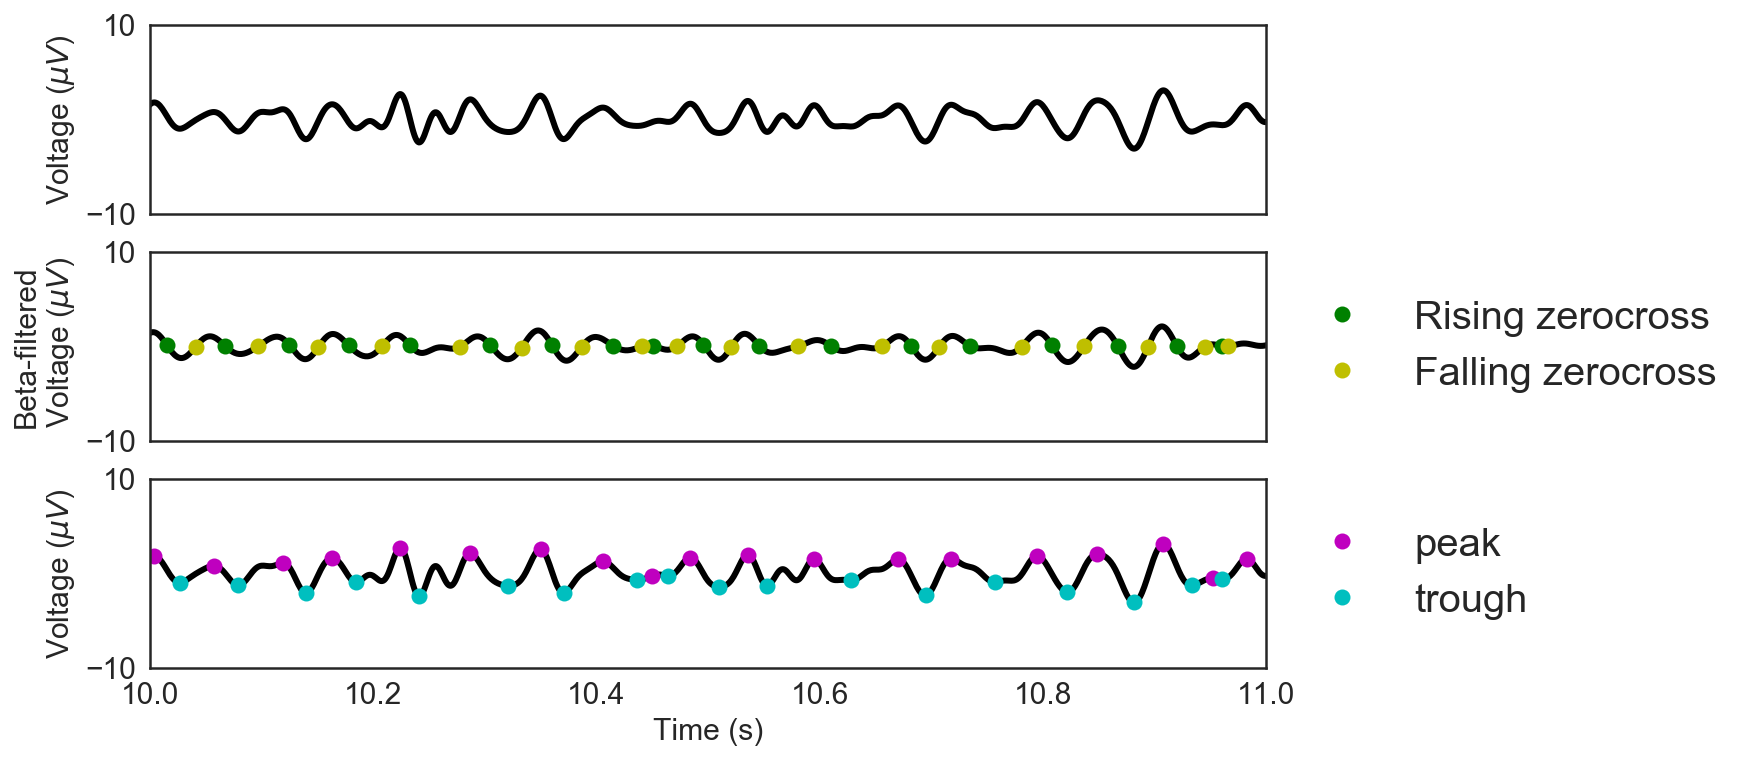

In [28]:
xlim = (10,11)
xlim2 = (4.83,4.88)
ylim = (-10,10)
pkidx = 104
tridx = 103

fig = plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(t, x,'k',linewidth=3)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,2)
plt.plot(t, xbeta, 'k',linewidth=3)
plt.plot(t[zerorises], xbeta[zerorises], 'go', ms=8,label='Rising zerocross')
plt.plot(t[zerofalls], xbeta[zerofalls], 'yo', ms=8,label='Falling zerocross')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Beta-filtered\n Voltage ($\mu V$)',size=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.tick_params(labelsize=15)
plt.xticks(visible=False)

plt.subplot(4,1,3)
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim)
plt.xlabel('Time (s)',size=15)
plt.tick_params(labelsize=15)

# B
### Estimating extrema sharpness

In [8]:
plt.figure(figsize=(4,2))
plt.plot(t, x, 'k-',linewidth=3)
plt.plot(t[pks[group][subj]],x[pks[group][subj]],'mo', ms=8, label='peak')
plt.plot(t[trs[group][subj]],x[trs[group][subj]],'co', ms=8, label='trough')
plt.plot([t[pks[group][subj][pkidx]]-widthS/Fs,t[pks[group][subj][pkidx]]-widthS/Fs],[-1000,1000],'m-')
plt.plot([t[pks[group][subj][pkidx]]+widthS/Fs,t[pks[group][subj][pkidx]]+widthS/Fs],[-1000,1000],'m-')
plt.plot([t[trs[group][subj][tridx]]-widthS/Fs,t[trs[group][subj][tridx]]-widthS/Fs],[-1000,1000],'c-')
plt.plot([t[trs[group][subj][tridx]]+widthS/Fs,t[trs[group][subj][tridx]]+widthS/Fs],[-1000,1000],'c-')
plt.plot(t[pks[group][subj][pkidx]-widthS],x[pks[group][subj][pkidx]-widthS],'m^',ms=10)
plt.plot(t[pks[group][subj][pkidx]+widthS],x[pks[group][subj][pkidx]+widthS],'m^',ms=10)
plt.plot(t[trs[group][subj][tridx]-widthS],x[trs[group][subj][tridx]-widthS],'c^',ms=10)
plt.plot(t[trs[group][subj][tridx]+widthS],x[trs[group][subj][tridx]+widthS],'c^',ms=10)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.ylim(ylim)
plt.yticks(ylim,size=15)
plt.xlim(xlim2)
plt.tick_params(labelsize=15)
plt.xlabel('Time (s)',size=15)

plt.tight_layout()

NameError: name 'x' is not defined

In [9]:
print(round(x[pks[group][subj][pkidx]]))
print(round(x[pks[group][subj][pkidx]-widthS]))
print(round(x[pks[group][subj][pkidx]+widthS]))
print(round(pksharp[group][subj][pkidx]))

print(round(x[trs[group][subj][tridx]]))
print(round(x[trs[group][subj][tridx]-widthS]))
print(round(x[trs[group][subj][tridx]+widthS]))
print(round(trsharp[group][subj][tridx]))

NameError: name 'x' is not defined

In [10]:
import imp
imp.reload(til)

<module 'shap_L' from '/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/shap_L.py'>

# C
### Sharpness in 1 subject before DBS

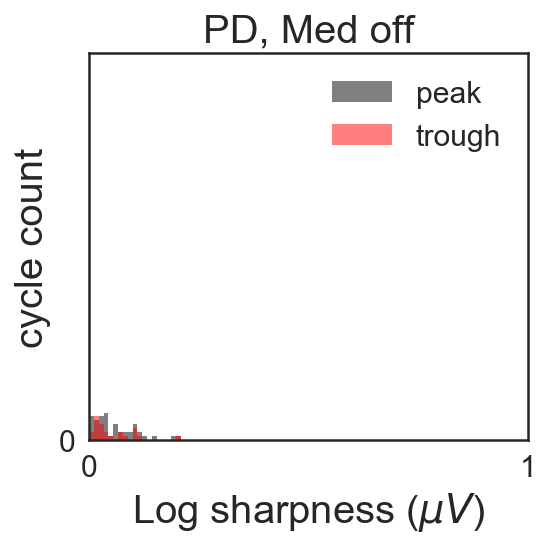

In [11]:
s = 4

Nbins = 20
bins=np.linspace(0,np.max(np.hstack((np.log10(pksharp['B'][s]),np.log10(trsharp['B'][s])))),Nbins)

plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['B'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['B'][s]),bins,color='r',alpha=0.5,label='trough')
plt.title('PD, Med off',size=20)
plt.ylabel('cycle count',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# D
### Sharpness in 1 subject during DBS

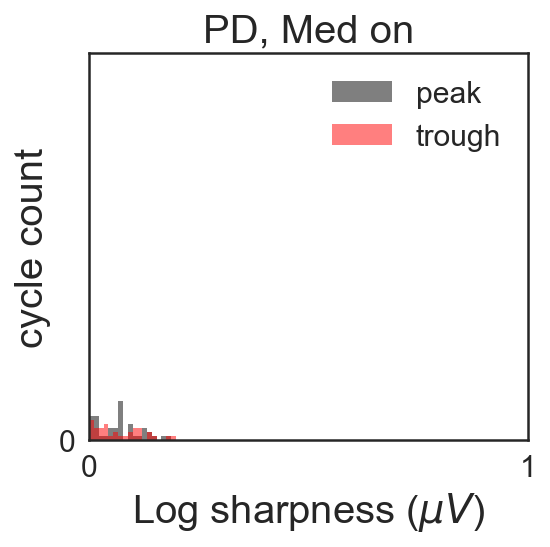

In [12]:
plt.figure(figsize=(4,4))
plt.hist(np.log10(pksharp['D'][s]),bins,color='k',alpha=0.5,label='peak')
plt.hist(np.log10(trsharp['D'][s]),bins,color='r',alpha=0.5,label='trough')
plt.ylabel('cycle count',size=20)
plt.title('PD, Med on',size=20)
plt.xlabel('Log sharpness ($\mu V$)',size=20)
plt.yticks([0,200],size=15)
plt.xticks([0,1,2,3],size=15)
plt.xlim((0,1))
plt.legend(loc='best',fontsize=15)
plt.ylim((0,100))
plt.tight_layout()

# E
### Sharpness ratio change with DBS

Ttest_relResult(statistic=1.4832437123602469, pvalue=0.16184435005258299)


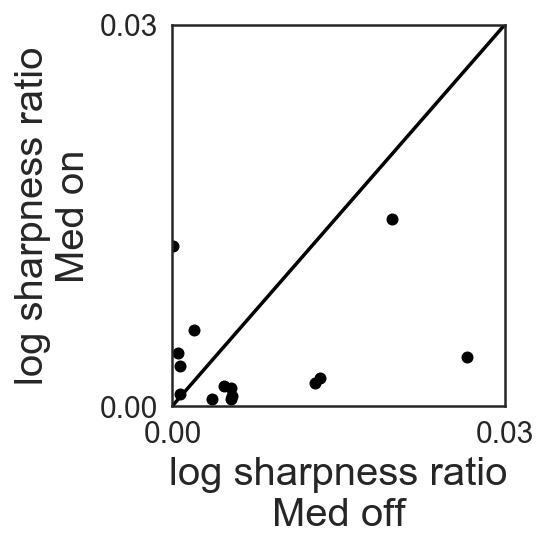

In [16]:
from plt import scatt_2cond
scatt_2cond(esrs['B'],esrs['D'],ms=12,
           lims = (0,.03), xlabel = 'log sharpness ratio\nMed off',
            ylabel = 'log sharpness ratio\nMed on',figsize=(4,4))
print(sp.stats.ttest_rel(esrs['B'],esrs['D']))

import scipy.io as sio
sio.savemat('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/sharpness_L.mat', {'esrs':esrs})
plt.savefig('/Users/RChenLab/Documents/All_MATLAB_files/SharpnesStudy/LFP_analyses/Files/Results/leftSTN_sharpnessRatio.png')